In [2]:
# Import dependencies
import random
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [3]:
# Create a set of random lats and longs combo

lats = np.random.uniform(-90.000,90.000,size=1500)

longs = np.random.uniform(-180.000,180.000, size=1500)

lat_longs = zip(lats, longs)

lat_longs

In [4]:
coordinates = list(lat_longs)

In [5]:
from citipy import citipy

In [6]:
# import requests library

import requests

# import API key

from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# create a list for holding cities

cities = []

# identify nearest city for each lat and long combo

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
#     if the city is unique, add to cities list
    if city not in cities:
        cities.append(city)
        
# print len cities

len(cities)

620

In [8]:
import requests

requests.__version__

'2.26.0'

In [9]:
# import time library

import time 

from datetime import datetime

In [1]:
# create empty list for weather data

city_data = []

# print beginning of the logging

print('Beginning Data Retrieval    ')

print('----------------------------')


# create counters

record_count = 1

set_count = 1

# Loop through all the cities in the list

for i, city in enumerate(cities):
    
    
#     Group cities in sets of 50 for logging purposes

    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
#         Create endpoint url
    city_url = url + '&q=' + city.replace(" ","+")
    
#     log the url
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
#     add 1 to the record count

    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------


NameError: name 'cities' is not defined

In [11]:
# Convert the array of dicts to a pd DF

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Victoria,22.2855,114.1577,79.25,94,100,5.99,HK,2022-05-13 00:06:35
1,Thompson,55.7435,-97.8558,62.76,36,20,2.30,CA,2022-05-13 00:20:34
2,Yellowknife,62.4560,-114.3525,46.56,52,19,11.01,CA,2022-05-13 00:08:53
3,Chernyshevskiy,63.0128,112.4714,41.31,90,98,5.84,RU,2022-05-13 00:20:34
4,Bluff,-46.6000,168.3333,53.71,74,100,8.57,NZ,2022-05-13 00:20:24
5,Sehithwa,-20.4667,22.7167,61.66,27,1,4.05,BW,2022-05-13 00:20:35
6,Provideniya,64.3833,-173.3000,42.91,70,75,6.71,RU,2022-05-13 00:12:14
7,Airai,-8.9266,125.4092,68.63,73,80,1.14,TL,2022-05-13 00:10:52
8,Bengkulu,-3.8004,102.2655,75.85,86,98,3.27,ID,2022-05-13 00:10:46
9,Faanui,-16.4833,-151.7500,82.27,67,8,16.67,PF,2022-05-13 00:11:06


In [12]:
new_column_order = ['City', 'Country','Date', 'Lat','Lng','Max Temp','Humidity','Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2022-05-13 00:06:35,22.2855,114.1577,79.25,94,100,5.99
1,Thompson,CA,2022-05-13 00:20:34,55.7435,-97.8558,62.76,36,20,2.30
2,Yellowknife,CA,2022-05-13 00:08:53,62.4560,-114.3525,46.56,52,19,11.01
3,Chernyshevskiy,RU,2022-05-13 00:20:34,63.0128,112.4714,41.31,90,98,5.84
4,Bluff,NZ,2022-05-13 00:20:24,-46.6000,168.3333,53.71,74,100,8.57
...,...,...,...,...,...,...,...,...,...
173,Dikson,RU,2022-05-13 00:24:53,73.5069,80.5464,23.58,85,100,7.47
174,Biak,ID,2022-05-13 00:21:16,-0.9131,122.8766,79.84,81,100,1.19
175,Saint-Pierre,RE,2022-05-13 00:24:54,-21.3393,55.4781,71.28,60,75,10.36
176,Puerto Carreno,CO,2022-05-13 00:23:53,6.1890,-67.4859,81.39,75,100,6.91


In [14]:
# create output file csv

output_data_file = 'weather_data/cities.csv'

# export the city_data into a csv

city_data_df.to_csv(output_data_file, index_label = 'City ID')

In [15]:
# Extract relevant fields from the DF for plotting

lats = city_data_df['Lat']

max_temps = city_data_df['Max Temp']

humidity = city_data_df['Humidity']

cloudiness = city_data_df['Cloudiness']

wind_speed = city_data_df['Wind Speed']

In [16]:
# todays date

today = time.strftime('%x')

today

'05/12/22'

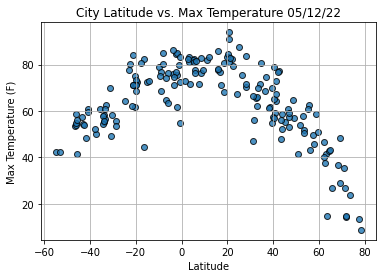

In [17]:
# scatter plot for lat vs max temp

plt.scatter(lats, max_temps, edgecolor='k', linewidths=1, marker='o', alpha =0.8, label = 'Cities')

# incorp other graph properties

plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))

plt.ylabel('Max Temperature (F)')

plt.xlabel('Latitude')

plt.grid(True)

# save fig

plt.savefig('weather_data/Fig2.png')

# show plot

plt.show()

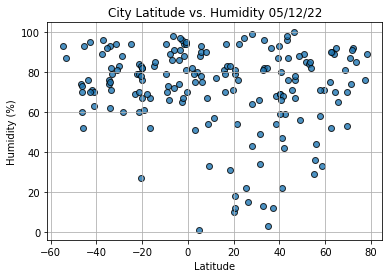

In [18]:
# scatter plot for lat vs humidity

plt.scatter(lats, humidity, edgecolor='k', linewidths=1, marker='o', alpha =0.8, label = 'Cities')

# incorp other graph properties

plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))

plt.ylabel('Humidity (%)')

plt.xlabel('Latitude')

plt.grid(True)

# save fig

plt.savefig('weather_data/Fig3.png')

# show plot

plt.show()

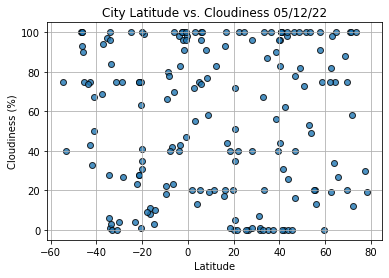

In [19]:
# scatter plot for lat vs cloudiness

plt.scatter(lats, cloudiness, edgecolor='k', linewidths=1, marker='o', alpha =0.8, label = 'Cities')

# incorp other graph properties

plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))

plt.ylabel('Cloudiness (%)')

plt.xlabel('Latitude')

plt.grid(True)

# save fig

plt.savefig('weather_data/Fig4.png')

# show plot

plt.show()

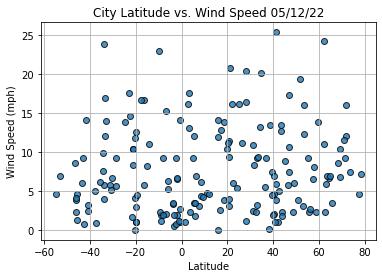

In [20]:
# scatter plot for lat vs wind speed

plt.scatter(lats, wind_speed, edgecolor='k', linewidths=1, marker='o', alpha =0.8, label = 'Cities')

# incorp other graph properties

plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))

plt.ylabel('Wind Speed (mph)')

plt.xlabel('Latitude')

plt.grid(True)

# save fig

plt.savefig('weather_data/Fig5.png')

# show plot

plt.show()

In [21]:
# import linear regression from the SciPy mod


from scipy.stats import linregress

# create function to perform linear regression on weather data

def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    
#     run regression on hemisphere weather data
    (slope,intercept,r_value,p_value,std_err) = linregress(x_values, y_values)
    
    
#     calc the regression line 'y value' from slope and intercept
    
    regress_values = x_values * slope + intercept
    
#     get equation on line
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
#     create scatter plot
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values, regress_values, "r")
    
#     annotate the text for the line equation
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()
    


In [22]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2022-05-13 00:11:01
Lat                       42.6001
Lng                      -73.9662
Max Temp                    77.41
Humidity                       59
Cloudiness                     62
Wind Speed                   5.03
Name: 13, dtype: object

In [23]:
# create northern and southern hemisphere DF

northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

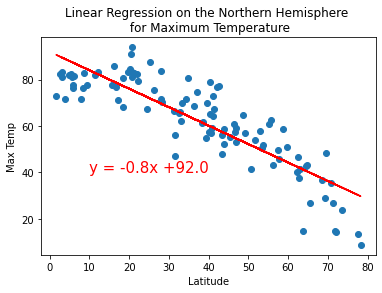

In [24]:
# linear regression on north

x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Max Temp']

# call function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))

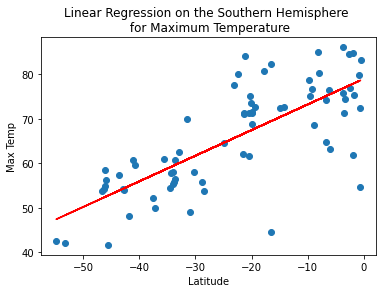

In [25]:
x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Max Temp']

# call function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,90))

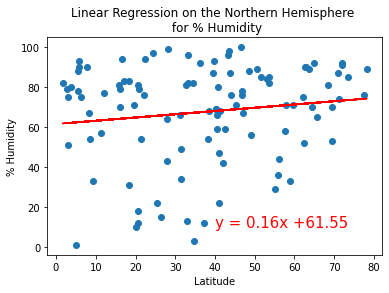

In [26]:
x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Humidity']

# call function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (40,10))

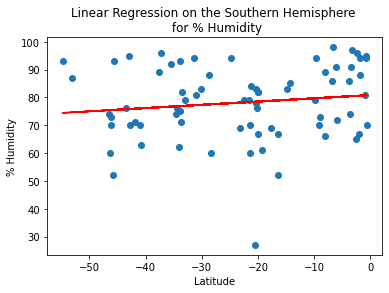

In [27]:
x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Humidity']

# call function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-50, 15))

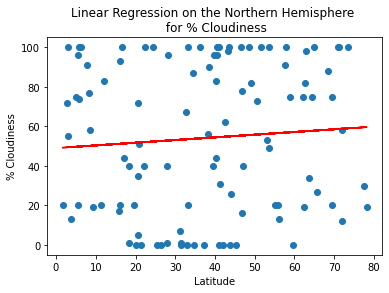

In [28]:
x_values = northern_hemi_df['Lat']

y_values = northern_hemi_df['Cloudiness']

# call function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,80))

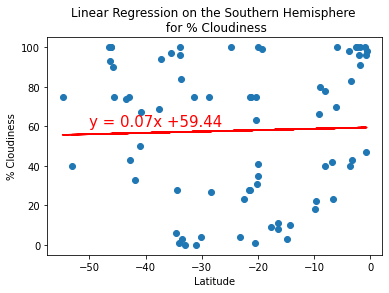

In [29]:
x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df['Cloudiness']

# call function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,60))

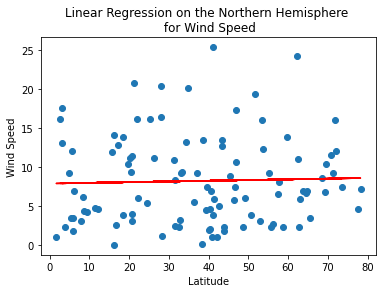

In [30]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

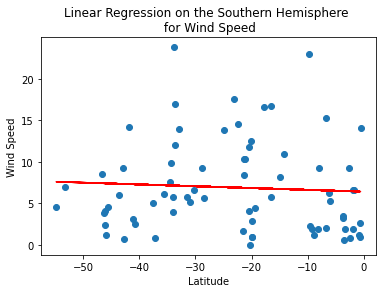

In [31]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(40,15))